In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
import math
from word2number import w2n

In [55]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [56]:
df['experience'].fillna('zero',inplace=True)
df['test_score(out of 10)'].fillna(math.floor(df['test_score(out of 10)'].median()),inplace=True)
df.count()

experience                    8
test_score(out of 10)         8
interview_score(out of 10)    8
salary($)                     8
dtype: int64

pip install word2number
from word2number import w2n
print(w2n.word_to_num('two point three'))
2.3

In [57]:
li = []
for i in range(0,8):
    xp = df.iloc[i]['experience']
    dxp = w2n.word_to_num(xp)
    li.insert(i,dxp)
print(li)
    

[0, 0, 5, 2, 7, 3, 10, 11]


In [58]:
li = [0, 0, 5, 2, 7, 3, 10, 11]
df['exp_in_num'] = li
df

,experience,test_score(out of 10),interview_score(out of 10),salary($),exp_in_num
0,zero,8.0,9,50000,0
1,zero,8.0,6,45000,0
2,five,6.0,7,60000,5
3,two,10.0,10,65000,2
4,seven,9.0,6,70000,7
5,three,7.0,10,62000,3
6,ten,8.0,7,72000,10
7,eleven,7.0,8,80000,11


In [59]:
reg = linear_model.LinearRegression()
reg.fit(df[['exp_in_num','test_score(out of 10)','interview_score(out of 10)']].values,df['salary($)'])

LinearRegression()

In [60]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [61]:
reg.intercept_

17737.26346433768

y = m1 * x1 + m2 * x2 + m3 * x3 + b

In [62]:
reg.predict([[2,9,6]])

array([53205.96797671])

In [63]:
2812.95487627 * 2 + 1845.70596798 * 9 + 2205.24017467 * 6 + 17737.26346433768

53205.967976717686

In [64]:
reg.predict([[12,10,10]])

array([92002.18340611])

In [65]:
2812.95487627 * 12 + 1845.70596798 * 10 + 2205.24017467 * 10 + 17737.26346433768

92002.18340607767

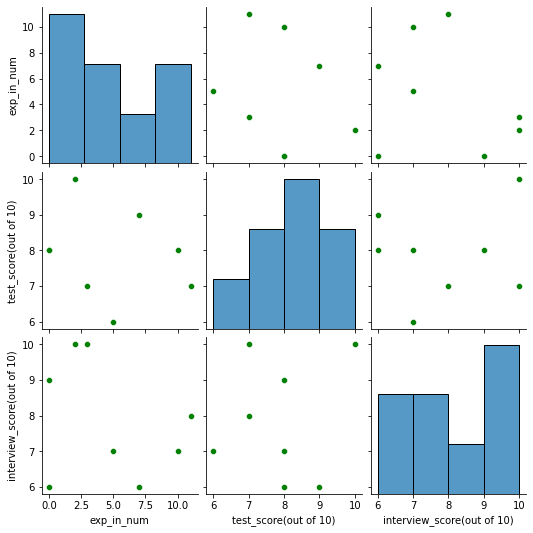

In [66]:
sns.pairplot(df[['exp_in_num','test_score(out of 10)','interview_score(out of 10)']], plot_kws = {'color': 'g'},)